## Task 3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ARUN KUMAR\Downloads\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df['Profit Percentage']= (df['Profit']/df['Sales'])*100
df['Discount Given']= df.Discount>0
df['Actual_Profit'] = df['Profit Percentage']+ df['Discount']*100
X = df[df.Profit<0]
df.shape

(9994, 16)

In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Profit Percentage,Actual_Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896,12.031393,27.651665
std,32063.693350,623.245101,2.225110,0.206452,234.260108,46.675435,30.639961
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,-275.000000,-195.000000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750,7.500000,21.250000
50%,56430.500000,54.490000,3.000000,0.200000,8.666500,27.000000,30.000000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,36.250000,48.000000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,50.000000,57.500000


In [5]:
X.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Profit Percentage,Actual_Profit
count,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000
mean,55991.122929,250.511574,3.762694,0.480887,-83.448042,-62.461137,-14.372414
std,26041.501999,715.067296,2.141347,0.235080,284.423422,62.741576,45.101653
min,1841.000000,0.444000,1.000000,0.100000,-6599.978000,-275.000000,-195.000000
25%,33024.000000,12.503000,2.000000,0.200000,-58.660950,-80.000000,-10.000000
50%,60623.000000,71.088000,3.000000,0.400000,-18.088200,-38.333333,0.000000
75%,77095.000000,284.922000,5.000000,0.700000,-6.261500,-16.666667,11.428571
max,98198.000000,22638.480000,14.000000,0.800000,-0.089500,-1.111111,48.000000


In [6]:
df.isna().sum()

Ship Mode            0
Segment              0
Country              0
City                 0
State                0
Postal Code          0
Region               0
Category             0
Sub-Category         0
Sales                0
Quantity             0
Discount             0
Profit               0
Profit Percentage    0
Discount Given       0
Actual_Profit        0
dtype: int64

In [7]:
df.shape

(9994, 16)

## Too many Cities very little data per City

In [8]:
df.Category.nunique()
#df['Sub-Category'].nuique()
#df.City.nunique()

3

In [9]:
X.groupby('Ship Mode').count()['City']/df.groupby('Ship Mode').count()['City']


Ship Mode
First Class       0.190507
Same Day          0.180479
Second Class      0.157841
Standard Class    0.196548
Name: City, dtype: float64

The correlation between Ship mode and the number of loss incuring products is almost non-existent.

In [10]:
X.Country.unique()

array(['United States'], dtype=object)

In [11]:
X.groupby('Region').count()['City']/df.groupby('Region').count()['City']

Region
Central    0.318984
East       0.194171
South      0.159877
West       0.099282
Name: City, dtype: float64

Central region contains the highest loss incuring products and West has the least. 

In [12]:
Y=X.groupby('State').count()['City']/df.groupby('State').count()['City']*100
Y.dropna(inplace=True)

These are the percentages of the loss incuring products

<AxesSubplot:xlabel='State'>

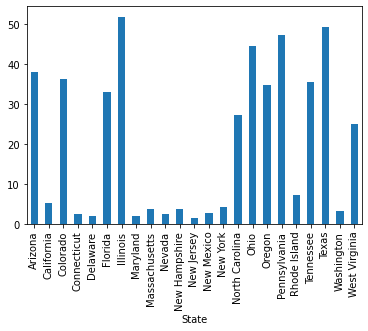

In [13]:
Y.plot.bar(x='State')

In [14]:
df.Segment.unique()
X.Segment.unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

Plot of Percent profit state wise

<AxesSubplot:xlabel='State'>

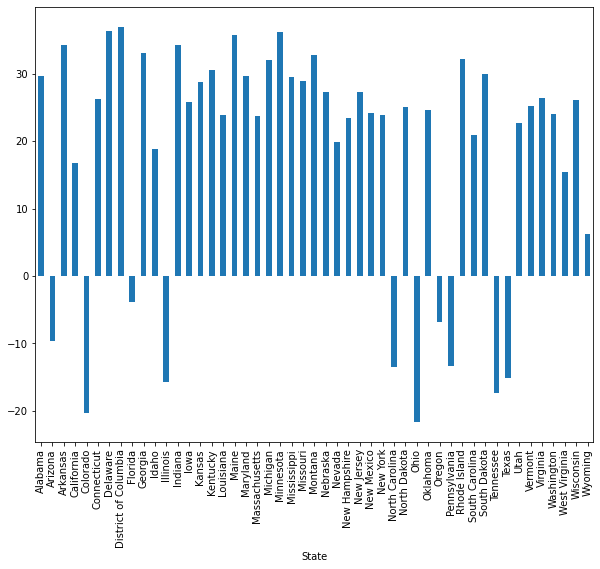

In [15]:
Z=df.groupby('State').sum()['Profit']/df.groupby('State').sum()['Sales']*100
from matplotlib.pyplot import figure
figure(figsize=(10,8))
Z.plot.bar()

## Analysing Relation between loss and category of products

In [16]:
X.groupby('Category').count()['City']

Category
Furniture          714
Office Supplies    886
Technology         271
Name: City, dtype: int64

In [17]:
X.groupby('Category').count()['City']/df.groupby('Category').count()['City'] *100

Category
Furniture          33.663366
Office Supplies    14.702954
Technology         14.672442
Name: City, dtype: float64

In [18]:
X.groupby('Category').sum()['Profit']/X.groupby('Category').sum()['Sales'] * 100

Category
Furniture         -23.629126
Office Supplies   -61.801198
Technology        -32.362203
dtype: float64

In [19]:
df.groupby('Category').sum()['Profit']/df.groupby('Category').sum()['Sales'] *100 

Category
Furniture           2.486695
Office Supplies    17.035158
Technology         17.395712
dtype: float64

Conclusion: Furniture is the worst performing Category but Office Supplies Has few products which have a very high loss percentage.

In [20]:
X['Discount Given'].sum()/X.shape[0]

1.0

In all the cases where a loss was faced by the company a discount was provided, But if Discount isn't provided 52.6% of the products which were earlier causing loss would become profitable.


In [21]:
X['Actual_Profit'][X.Actual_Profit<0].count()/X.shape[0]

0.4740780331373597

In [22]:
Y=X.groupby('Sub-Category').count()['City']/df.groupby('Sub-Category').count()['City']*100

<AxesSubplot:xlabel='Sub-Category'>

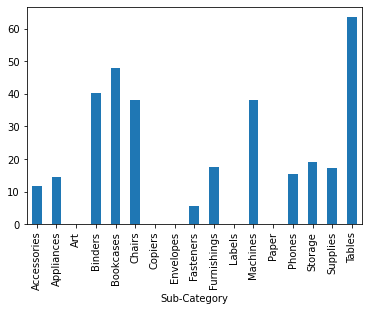

In [23]:
Y.plot.bar()

Tables, Bookcases, Binders, Chairs and Machines are the worst performing sub-categories.